### Setup

https://github.com/coqui-ai/TTS

```
git clone https://github.com/coqui-ai/TTS
pip install -e .[all,dev,notebooks]  # Select the relevant extras
```

In [11]:
import tensorflow as tf

print("TF Version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))

ModuleNotFoundError: No module named 'tensorflow'

# Zero Shot

In [ ]:
import os
import torchaudio

def find_long_clips(speaker_name, min_duration=4.0, base_dir="clean_chunks"):
    """
    Lists all clips for a given speaker that are longer than `min_duration` seconds.

    Args:
        speaker_name (str): Name of the speaker (folder inside clean_chunks/)
        min_duration (float): Minimum duration in seconds
        base_dir (str): Base directory where clean_chunks are stored

    Returns:
        List of file paths that meet the duration criteria
    """
    speaker_path = os.path.join(base_dir, speaker_name)
    if not os.path.exists(speaker_path):
        raise ValueError(f"No such speaker directory: {speaker_path}")

    qualified_clips = []

    for filename in os.listdir(speaker_path):
        if not filename.endswith(".wav"):
            continue

        filepath = os.path.join(speaker_path, filename)

        try:
            waveform, sample_rate = torchaudio.load(filepath)
            duration = waveform.shape[1] / sample_rate

            if duration >= min_duration:
                qualified_clips.append((filepath, duration))

        except Exception as e:
            print(f"Error reading {filepath}: {e}")

    return qualified_clips


speaker = "Mitch"
min_length = 6.0  # seconds

clips = find_long_clips(speaker_name=speaker, min_duration=min_length)

print(f"✅ Found {len(clips)} clips for {speaker} >= {min_length} seconds:")
for path, duration in clips:
    print(f"  {path} ({duration:.2f} sec)")


✅ Found 17 clips for Mitch >= 6.0 seconds:
  clean_chunks\Mitch\2024-10-28_22-13-06_chunk3.wav (8.50 sec)
  clean_chunks\Mitch\2024-10-28_22-15-41_chunk6.wav (6.70 sec)
  clean_chunks\Mitch\2024-10-28_22-20-59_chunk1.wav (10.30 sec)
  clean_chunks\Mitch\2024-10-28_22-23-50_chunk1.wav (6.40 sec)
  clean_chunks\Mitch\2024-10-28_22-31-30_chunk5.wav (6.00 sec)
  clean_chunks\Mitch\2024-10-28_22-42-43_chunk1.wav (6.60 sec)
  clean_chunks\Mitch\2024-10-28_22-49-51_chunk1.wav (6.80 sec)
  clean_chunks\Mitch\2024-10-28_22-54-12_chunk4.wav (6.00 sec)
  clean_chunks\Mitch\2024-10-28_22-56-01_chunk2.wav (7.30 sec)
  clean_chunks\Mitch\2024-10-28_22-57-22_chunk0.wav (6.50 sec)
  clean_chunks\Mitch\2024-10-28_22-57-49_chunk0.wav (6.00 sec)
  clean_chunks\Mitch\2024-10-28_22-57-49_chunk4.wav (10.80 sec)
  clean_chunks\Mitch\2024-10-28_22-59-34_chunk0.wav (6.00 sec)
  clean_chunks\Mitch\2024-10-28_23-05-43_chunk3.wav (6.40 sec)
  clean_chunks\Mitch\2024-10-28_23-05-58_chunk0.wav (6.76 sec)
  clean_ch

Counting clips: 100%|██████████| 5/5 [00:00<00:00, 2490.98it/s]


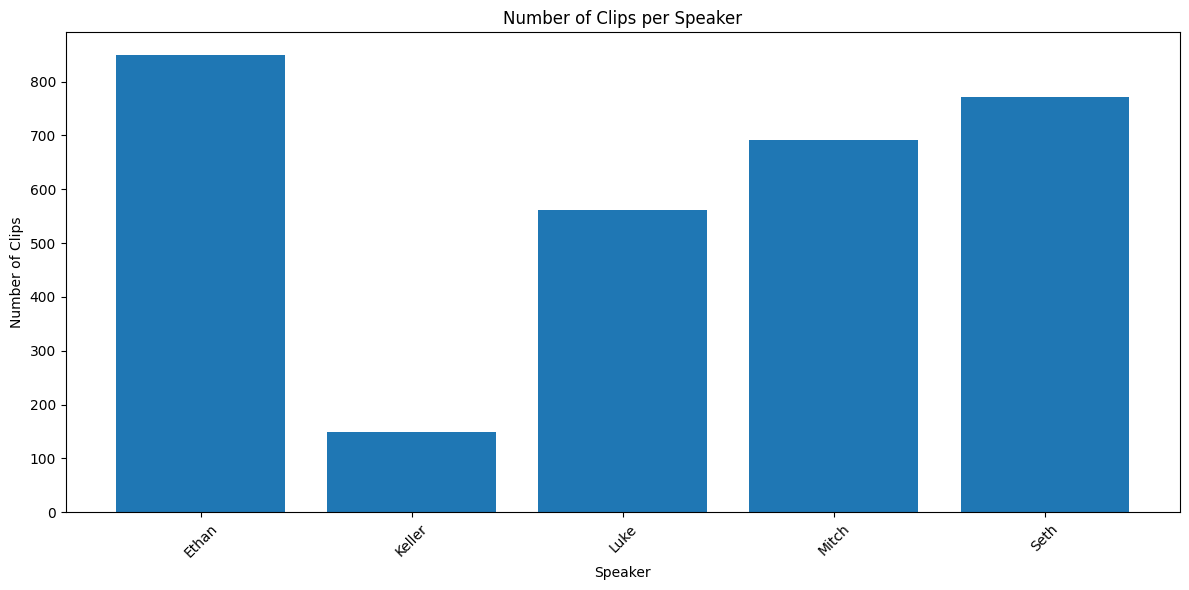

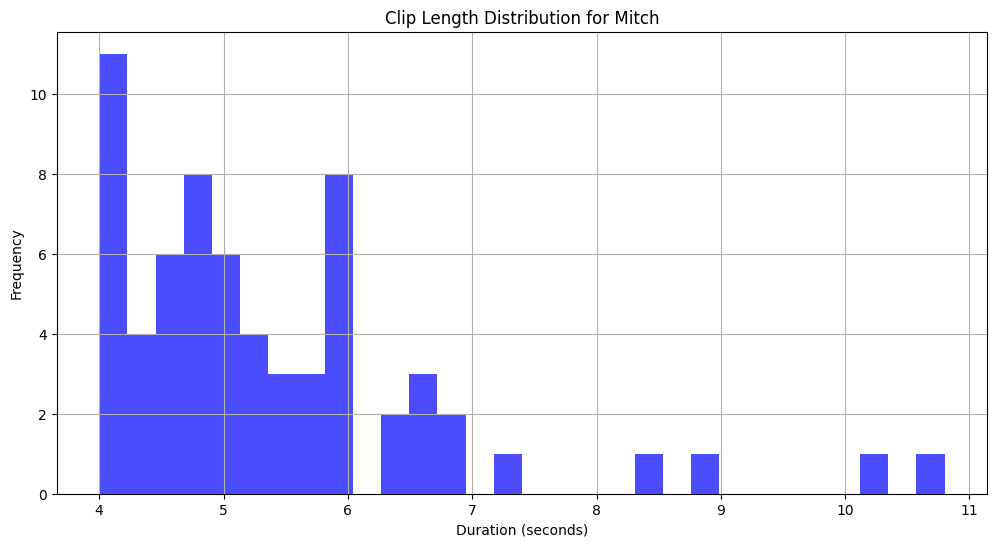

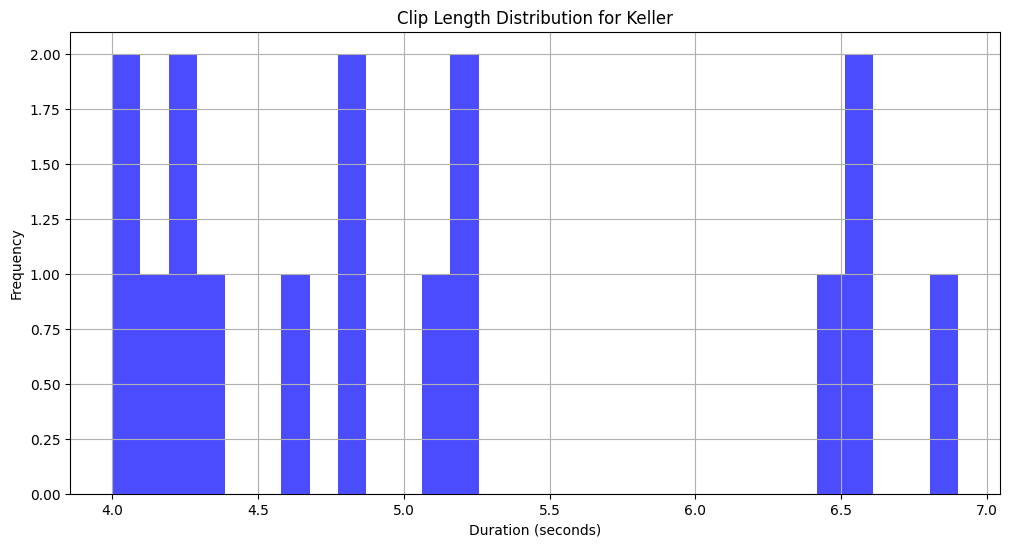

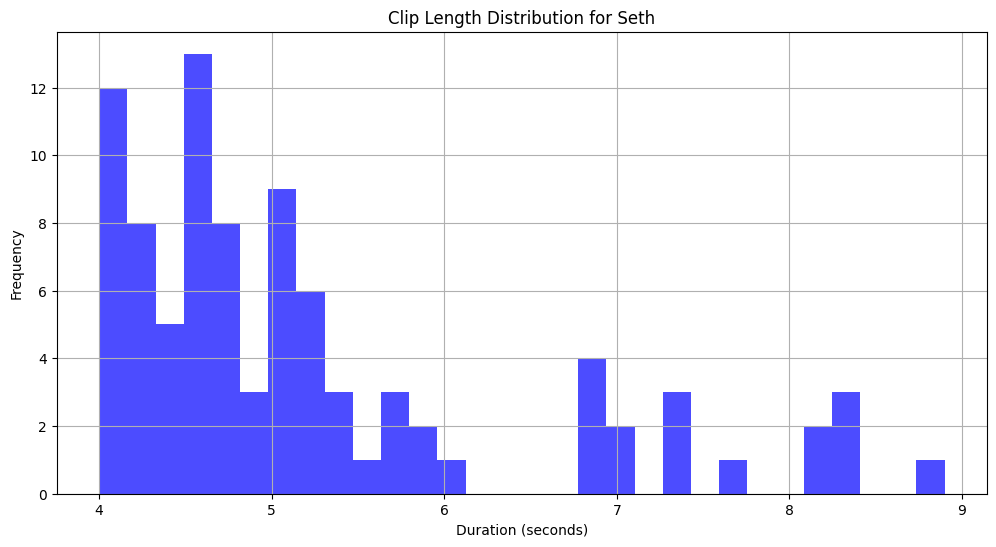

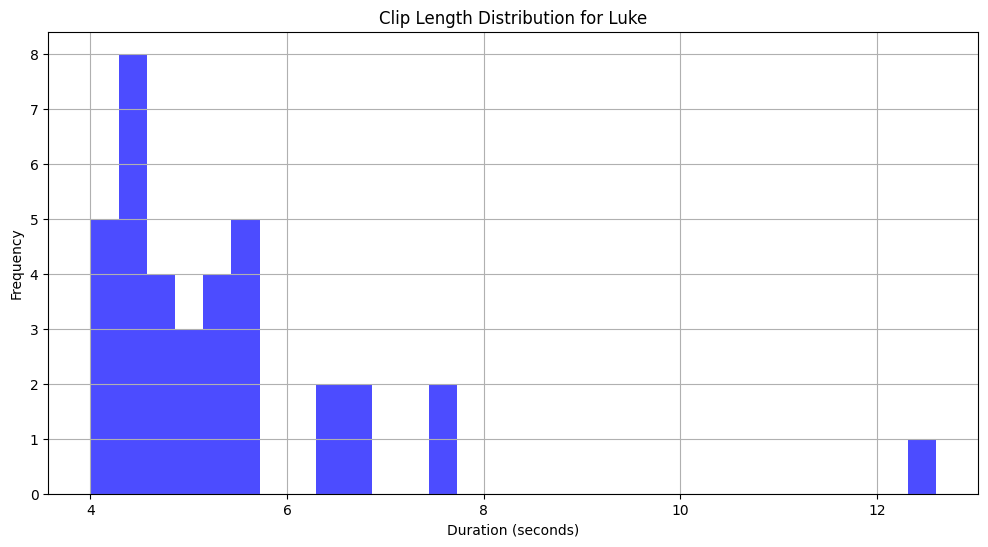

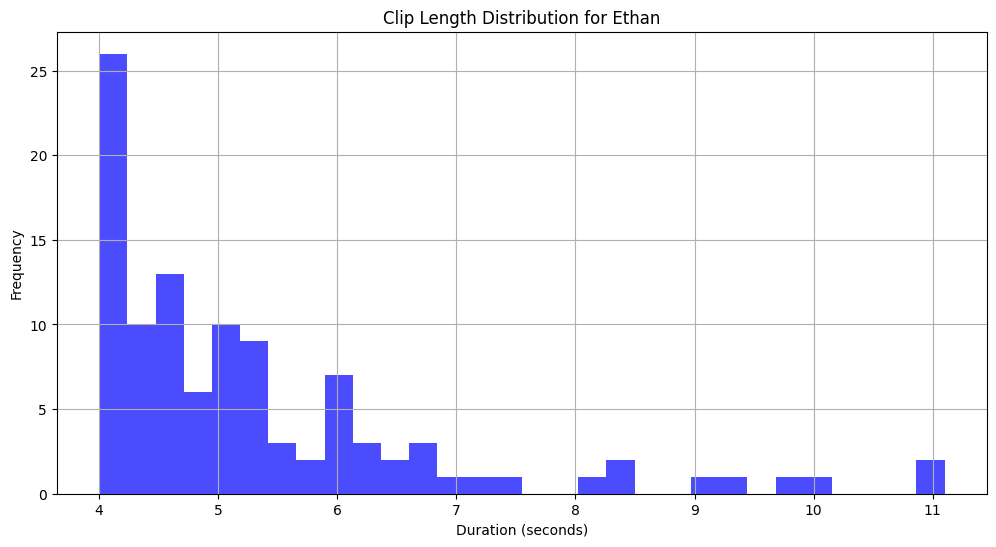

In [ ]:
# Count distribution per person
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os


def count_clips_per_speaker(base_dir="clean_chunks"):
    """
    Counts the number of clips per speaker in the given directory.

    Args:
        base_dir (str): Base directory where clean_chunks are stored

    Returns:
        DataFrame with speaker names and their respective clip counts
    """
    speakers = os.listdir(base_dir)
    counts = []

    for speaker in tqdm(speakers, desc="Counting clips"):
        speaker_path = os.path.join(base_dir, speaker)
        if not os.path.isdir(speaker_path):
            continue

        clip_count = len([f for f in os.listdir(speaker_path) if f.endswith(".wav")])
        counts.append((speaker, clip_count))

    df = pd.DataFrame(counts, columns=["Speaker", "Clip Count"])
    return df

# Count clips per speaker and plot
df = count_clips_per_speaker()
plt.figure(figsize=(12, 6))
plt.bar(df["Speaker"], df["Clip Count"])
plt.xticks(rotation=45)
plt.xlabel("Speaker")
plt.ylabel("Number of Clips")
plt.title("Number of Clips per Speaker")
plt.tight_layout()
plt.show()

# Plot distribution of clip lengths by speaker
def plot_clip_length_distribution(speaker_name, base_dir="clean_chunks"):
    """
    Plots the distribution of clip lengths for a given speaker.

    Args:
        speaker_name (str): Name of the speaker (folder inside clean_chunks/)
        base_dir (str): Base directory where clean_chunks are stored
    """
    clips = find_long_clips(speaker_name, base_dir=base_dir)

    durations = [duration for _, duration in clips]

    plt.figure(figsize=(12, 6))
    plt.hist(durations, bins=30, alpha=0.7, color='blue')
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Frequency")
    plt.title(f"Clip Length Distribution for {speaker_name}")
    plt.grid()
    plt.show()

plot_clip_length_distribution(speaker_name="Mitch")
plot_clip_length_distribution(speaker_name="Keller")
plot_clip_length_distribution(speaker_name="Seth")
plot_clip_length_distribution(speaker_name="Luke")
plot_clip_length_distribution(speaker_name="Ethan")


In [ ]:
reference_clip = clips[0][0]
print(f"✅ Using {reference_clip} as reference clip for cloning.")

✅ Using clean_chunks\Mitch\2024-10-28_22-13-06_chunk3.wav as reference clip for cloning.


In [13]:
from TTS.api import TTS

# Load XTTS model (downloads automatically if needed)
tts = TTS(model_name="tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)

# Your custom inputs
text = "This is my cloned voice speaking from the AI dimension."
speaker_wav = reference_clip  # Path to the reference clip
language = "en"

# Output path
output_path = "xtts_output.wav"

# Generate
tts.tts_to_file(
    text=text,
    speaker_wav=speaker_wav,
    language=language,
    file_path=output_path
)

print(f"✅ Generated voice saved at: {output_path}")


# pip install blis==0.7.9 --prefer-binary

ModuleNotFoundError: No module named 'TTS.api'